In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

## Ejercicio 1

Vuelve a hacer PCA sobre el dataset MNIST de la tarea. Cuántas dimensiones necesitas para explicar el 95% de la varianza? 

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
#Definimos las variables
X, y = mnist['data'], mnist['target']
X_sample = X[60000:]
y_sample = y[60000:]

In [3]:
#Aplicamos pca
pca = PCA(n_components=0.95)
X_PCA = pca.fit_transform(X_sample)

# Recuperamos la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
#Sumamos las varianzas
acumulado = np.cumsum(explained_variance_ratio)
# Buscamos el primer elemento de las varianzas que exceda el 0.95
dimensiones = np.argmax(acumulado >= 0.95) + 1

In [4]:
print(f"Se necesitan {dimensiones} dimensiones para explicar 95% de la varianza")

Se necesitan 149 dimensiones para explicar 95% de la varianza


## Ejercicio 2

Ahora grafica número de dimensiones finales después del PCA v/s varianza explicada, para aumentos de a 5, partiendo desde 2: $X = 2, 7, 12, 17, 22$ (la varianza que explica el PCA es la suma de las varianzas que explican cada una de las dimensiones). ¿Podemos usar una especie de método del codo para elegir cuál es un número óptimo de dimensiones con las que nos quedamos luego de usar PCA? ¿O es más bien estable la forma en que cada dimensión nueva va aportando menos varianza?

In [5]:
# Creamos un conjunto de las dimensiones 
pca_dim = np.arange(2, len(explained_variance_ratio) + 1, 5)
#Recuperamos las varianzas resultantes
varianza_explicada = np.cumsum(explained_variance_ratio)[pca_dim - 1]

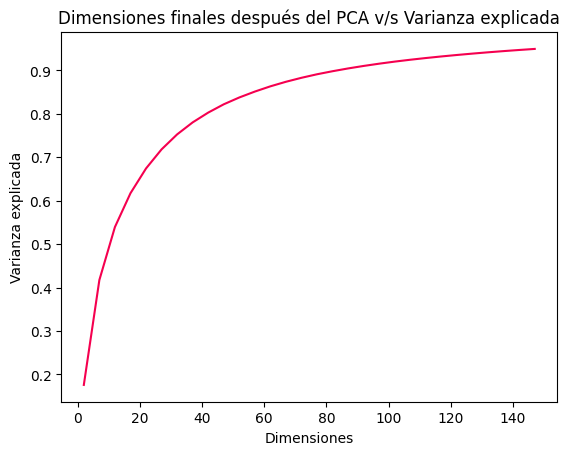

In [6]:
plt.plot(pca_dim, varianza_explicada, color="#F5004F")
plt.xlabel('Dimensiones')
plt.ylabel('Varianza explicada')
plt.title('Dimensiones finales después del PCA v/s Varianza explicada')
plt.show()